# Filtering, Ordering and Grouping Queries

### References

[SqlAlchemy Expressions](https://docs.sqlalchemy.org/en/latest/core/sqlelement.html#module-sqlalchemy.sql.expression)  


In [34]:
from sqlalchemy import create_engine, Table, MetaData, select
from sqlalchemy import and_, or_, not_, between

# instantiate the database connection
engine = create_engine('sqlite:///../data/sqlalchemy/census.sqlite')
connection = engine.connect()
engine.table_names()

['census', 'state_fact']

In [35]:
# instantiate the table obj
census = Table('census', MetaData(), autoload=True, autoload_with=engine)
census.columns.keys()

['state', 'sex', 'age', 'pop2000', 'pop2008']

## Where clause

We can use the `where()` clause to filter results, which can be combined with:

* comparison operators `==`, `<`, `>`, `<=`, `>=` and `!=`.
* expressions  (method on column obj):
    
    * `in_()` match against a list
    * `like()` match a gainst a partial value using wildcards
    * `any_()`  
    * `startswith()`
    * `between()` match against a range (function, must be imported)
    
* conjunctions (must be imported) - support multiple conditions within a `where()` clause
   
    * `and_()` logical **and**
    * `or_()` logical **or**
    * `not_()` 

In [36]:
stmt = select([census])
query = stmt.where(
            and_(census.columns.state == 'New Jersey', 
                 census.columns.pop2008 > 70000))       

Instead of calling `fetchall()`, we'll iterate over the **results proxy**.

In [37]:
for result in connection.execute(query):
    print(result.state, result.pop2000, result.pop2008)

New Jersey 68650 71249
New Jersey 65564 71097
New Jersey 61817 70961
New Jersey 59206 70886
New Jersey 56977 71595
New Jersey 71100 72619
New Jersey 68286 73252
New Jersey 67763 72477
New Jersey 64313 71522
New Jersey 62759 72520
New Jersey 60526 73425
New Jersey 59877 71188
New Jersey 98078 120390


In [49]:
query = stmt.where(
        and_(census.columns.state.startswith('New'),
            between(census.columns.pop2000, 28000, 30000)))

In [50]:
for result in connection.execute(query):
    print(result.state, result.pop2000, result.pop2008)

New Jersey 29440 36620
New Jersey 28747 34605
New Jersey 28748 25597


In [61]:
states =  ['New York', 'California', 'Texas']
query = stmt.where(
            and_(census.columns.state.in_(states),
                census.columns.pop2008 > 280000))

In [62]:
for result in connection.execute(query):
    print(result.state, result.pop2000, result.pop2008)

California 252494 287900
California 247978 282445
California 255482 284538
California 252607 294734
California 250964 290319
California 245324 284859
California 281214 292730
California 261885 280827
California 234949 285759
California 294583 400288


In [63]:
query = stmt.where(
  and_(census.columns.state == 'New York',
       or_(census.columns.age == 21,
          census.columns.age == 37)))

In [65]:
for result in connection.execute(query):
    print(result.state, result.age, result.pop2000, result.pop2008)

New York 21 126166 141932
New York 37 152078 136270
New York 21 124575 142302
New York 37 157911 140890


When you want to use logical `and` with more than two conditions, use `&` making sure to wrap the condition within `()`.

In [76]:
# select only non-male records from California - chain multiple conditions
query = stmt.where(
    (census.columns.state == 'California') & 
    (census.columns.sex != 'M') &
    (census.columns.age > 70)
)

In [77]:
for result in connection.execute(query):
    print(result.age, result.sex)

71 F
72 F
73 F
74 F
75 F
76 F
77 F
78 F
79 F
80 F
81 F
82 F
83 F
84 F
85 F


## Order by clauses

`order_by()` default order is ascending, strings in alphabetical order.

In [78]:
query = stmt.order_by(census.columns.state)

In [95]:
def print_states(query):
    states = {}
    for result in connection.execute(query):
        state = result.state
        if state in states:
            states[state] += 1
        else:
            states[state] = 1
    return states

In [96]:
print_states(query)

{'Alabama': 172,
 'Alaska': 172,
 'Arizona': 172,
 'Arkansas': 172,
 'California': 172,
 'Colorado': 172,
 'Connecticut': 172,
 'Delaware': 172,
 'District of Columbia': 172,
 'Florida': 172,
 'Georgia': 172,
 'Hawaii': 172,
 'Idaho': 172,
 'Illinois': 172,
 'Indiana': 172,
 'Iowa': 172,
 'Kansas': 172,
 'Kentucky': 172,
 'Louisiana': 172,
 'Maine': 172,
 'Maryland': 172,
 'Massachusetts': 172,
 'Michigan': 172,
 'Minnesota': 172,
 'Mississippi': 172,
 'Missouri': 172,
 'Montana': 172,
 'Nebraska': 172,
 'Nevada': 172,
 'New Hampshire': 172,
 'New Jersey': 172,
 'New Mexico': 172,
 'New York': 172,
 'North Carolina': 172,
 'North Dakota': 172,
 'Ohio': 172,
 'Oklahoma': 172,
 'Oregon': 172,
 'Pennsylvania': 172,
 'Rhode Island': 172,
 'South Carolina': 172,
 'South Dakota': 172,
 'Tennessee': 172,
 'Texas': 172,
 'Utah': 172,
 'Vermont': 172,
 'Virginia': 172,
 'Washington': 172,
 'West Virginia': 172,
 'Wisconsin': 172,
 'Wyoming': 172}

To reverse the order, wrap the column with the `desc()` function.

In [115]:
from sqlalchemy import desc

query = stmt.order_by(desc(census.columns.state))
print_states(query)

{'Wyoming': 172,
 'Wisconsin': 172,
 'West Virginia': 172,
 'Washington': 172,
 'Virginia': 172,
 'Vermont': 172,
 'Utah': 172,
 'Texas': 172,
 'Tennessee': 172,
 'South Dakota': 172,
 'South Carolina': 172,
 'Rhode Island': 172,
 'Pennsylvania': 172,
 'Oregon': 172,
 'Oklahoma': 172,
 'Ohio': 172,
 'North Dakota': 172,
 'North Carolina': 172,
 'New York': 172,
 'New Mexico': 172,
 'New Jersey': 172,
 'New Hampshire': 172,
 'Nevada': 172,
 'Nebraska': 172,
 'Montana': 172,
 'Missouri': 172,
 'Mississippi': 172,
 'Minnesota': 172,
 'Michigan': 172,
 'Massachusetts': 172,
 'Maryland': 172,
 'Maine': 172,
 'Louisiana': 172,
 'Kentucky': 172,
 'Kansas': 172,
 'Iowa': 172,
 'Indiana': 172,
 'Illinois': 172,
 'Idaho': 172,
 'Hawaii': 172,
 'Georgia': 172,
 'Florida': 172,
 'District of Columbia': 172,
 'Delaware': 172,
 'Connecticut': 172,
 'Colorado': 172,
 'California': 172,
 'Arkansas': 172,
 'Arizona': 172,
 'Alaska': 172,
 'Alabama': 172}

We can order by multiple columns, by passinf in multiple arguments to `order_by`. `order_by` will order by the first column, if there are any duplicates, it will order by the second, and so on.

In [111]:
query = stmt.where(
            (census.columns.state == 'California') & 
            (census.columns.pop2008 > 270000)) \
            .order_by(census.columns.sex, census.columns.pop2008)

In [112]:
for result in connection.execute(query):
    print(result.state, result.sex, result.pop2008)

California F 270307
California F 270406
California F 270948
California F 273711
California F 274356
California F 277301
California F 278712
California F 285759
California F 400288
California M 270126
California M 271345
California M 271675
California M 271720
California M 272385
California M 273041
California M 273260
California M 273622
California M 274754
California M 275989
California M 276500
California M 277848
California M 277993
California M 278186
California M 278270
California M 278703
California M 279604
California M 279872
California M 280827
California M 282445
California M 284538
California M 284859
California M 287900
California M 290319
California M 292730
California M 294734


In [113]:
# order by state ascending, age descending
query = stmt.order_by(
    census.columns.state,
    desc(census.columns.age)
)

connection.execute(query).fetchall()[:10]

[('Alabama', 'M', 85, 18259, 26100),
 ('Alabama', 'F', 85, 49764, 58979),
 ('Alabama', 'M', 84, 4066, 5295),
 ('Alabama', 'F', 84, 8418, 9870),
 ('Alabama', 'M', 83, 4732, 6012),
 ('Alabama', 'F', 83, 9448, 10825),
 ('Alabama', 'M', 82, 5188, 6494),
 ('Alabama', 'F', 82, 9453, 11112),
 ('Alabama', 'M', 81, 5965, 7537),
 ('Alabama', 'F', 81, 10680, 12211)]

### SQL Functions

* Found in the sqlalchemy `func` module, there are methods such as Count, Sum, etc. 
* More efficient to use sql functions than looping over results and employing python methods.
* also known as **aggregate** functions since they 'collapse' multiple values into one.
* call the `scalar()` method on the results proxy obj to get back the actual result.
* Don't import `sum` function directly since it will interfer with Python's version.

In [117]:
from sqlalchemy import func

# calculate the sum of the 2008 population
query = select([func.sum(census.columns.pop2008)])
connection.execute(query).scalar()

302876613

In [133]:
# count the distinct number of values
query = select([func.count(census.columns.pop2008.distinct())])
connection.execute(query).scalar()

8107

In [134]:
# count the number of states
query = select([func.count(census.columns.state.distinct())])
connection.execute(query).scalar()

51

### Group by

* group rows by common values.
* can accept multiple columns, all columns will be grouped or aggregated by a function 

Calculate the total pop for each gender in 2008.

In [118]:
stmt = select([census.columns.sex, func.sum(census.columns.pop2008)])
query = stmt.group_by(census.columns.sex)
connection.execute(query).fetchall()

[('F', 153959198), ('M', 148917415)]

In [121]:
stmt = select([
    census.columns.state, 
    census.columns.sex, 
    func.sum(census.columns.pop2000
)])
query = stmt.group_by(census.columns.state, census.columns.sex)
connection.execute(query).fetchall()[:10]

[('Alabama', 'F', 2300612),
 ('Alabama', 'M', 2137947),
 ('Alaska', 'F', 300043),
 ('Alaska', 'M', 308545),
 ('Arizona', 'F', 2583468),
 ('Arizona', 'M', 2560463),
 ('Arkansas', 'F', 1370155),
 ('Arkansas', 'M', 1302279),
 ('California', 'F', 17033913),
 ('California', 'M', 16795529)]

Column names are automatically generated for functions in the result set, e.g. `count_1`. We can use the `label()` method on a function to give it a specific name. We can then access the name in the results set.

In [135]:
# select the state and count of ages by state
stmt = select([census.columns.state, func.count(census.columns.age)])

query = stmt.group_by(census.columns.state)
results = connection.execute(query).fetchall()

print(results[0].keys())
results[:10]

['state', 'count_1']


[('Alabama', 172),
 ('Alaska', 172),
 ('Arizona', 172),
 ('Arkansas', 172),
 ('California', 172),
 ('Colorado', 172),
 ('Connecticut', 172),
 ('Delaware', 172),
 ('District of Columbia', 172),
 ('Florida', 172)]

In [136]:
stmt = select([
    census.columns.state, 
    census.columns.sex, 
    func.sum(census.columns.pop2008).label('pop2008_sum')
])
query = stmt.group_by(census.columns.state, census.columns.sex)
results = connection.execute(query).fetchall()
print(type(results))
print(results[0].keys()) # column namesprint()
results[:6]

<class 'list'>
['state', 'sex', 'pop2008_sum']


[('Alabama', 'F', 2401960),
 ('Alabama', 'M', 2247407),
 ('Alaska', 'F', 325753),
 ('Alaska', 'M', 338793),
 ('Arizona', 'F', 3240456),
 ('Arizona', 'M', 3240311)]

### Using Pandas

We can instantiate a pandas dataframe from a sqlalchemy results set, all we need to do if define the column names separately. We can then treat the dataframe just like any other pandas dataframe.

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.DataFrame(results)
df[:6]

,0,1,2
0,Alabama,F,2401960
1,Alabama,M,2247407
2,Alaska,F,325753
3,Alaska,M,338793
4,Arizona,F,3240456
5,Arizona,M,3240311


In [139]:
# use the keys from the first result
df.columns = results[0].keys()
df[:6]

,state,sex,pop2008_sum
0,Alabama,F,2401960
1,Alabama,M,2247407
2,Alaska,F,325753
3,Alaska,M,338793
4,Arizona,F,3240456
5,Arizona,M,3240311


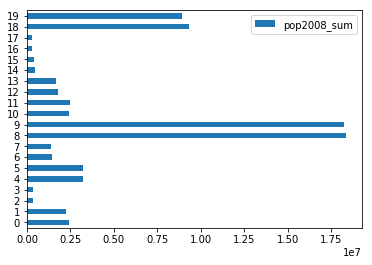

In [141]:
df[:20].plot.barh()
plt.show()